<a href="https://colab.research.google.com/github/aryelmedeiros/EDII/blob/main/Lista_U2IA_Lista_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QUESTÃO 1 


### Importando as bibliotecas necessarias

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

##A) $f_(x_1,x_2) = (1 - x_1)^2 + 100 (x_2 -x_1^2)^2 $

In [ ]:
def f(x1,x2):
  r = (1-x1)**2 + 100*(x2-x1**2)**2
  return r 

### Plotar a superficie da Função

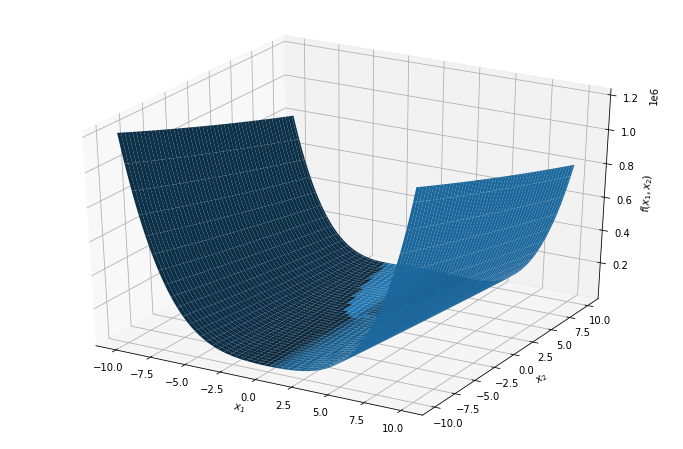

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(projection='3d'))

x1, x2 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
z = f(x1, x2)

ax.plot_surface(x1, x2, z)
ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    np.vstack([x1.flatten(), x2.flatten()]).T, 
    z.flatten(), 
    test_size=0.3, 
    random_state=36
)

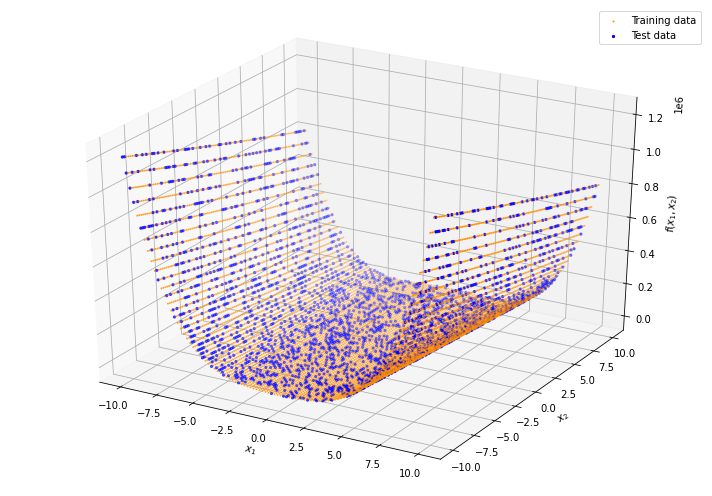

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(projection='3d'))

ax.scatter(x_train[:,0], x_train[:,1], y_train, s=1, color='darkorange', label='Training data')
ax.scatter(x_test[:,0], x_test[:,1], y_test, s=5, color='blue', label='Test data')

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.legend()
plt.tight_layout()
plt.show()

###Modelando a MLP 

In [ ]:
mlp = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])

mlp.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 2,977
Trainable params: 2,977
Non-trainabl

##Treinando a MLP

In [ ]:
history = mlp.fit(
    x_train, y_train,
    batch_size=8,
    epochs=200,
    validation_split=0.1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
    ]
)

Epoch 1/200
788/788 [==============================] - 1s 1ms/step - loss: 6355216.5000 - val_loss: 6525846.0000 - lr: 1.0000e-04
Epoch 2/200
788/788 [==============================] - 1s 2ms/step - loss: 6230631.0000 - val_loss: 6200835.5000 - lr: 1.0000e-04
Epoch 3/200
788/788 [==============================] - 1s 2ms/step - loss: 6061654.0000 - val_loss: 5715982.0000 - lr: 1.0000e-04
Epoch 4/200
788/788 [==============================] - 1s 2ms/step - loss: 5877896.0000 - val_loss: 5539400.0000 - lr: 1.0000e-04
Epoch 5/200
788/788 [==============================] - 1s 1ms/step - loss: 5717043.5000 - val_loss: 6710863.0000 - lr: 1.0000e-04
Epoch 6/200
788/788 [==============================] - 1s 2ms/step - loss: 5612905.5000 - val_loss: 5467584.5000 - lr: 1.0000e-04
Epoch 7/200
788/788 [==============================] - 1s 2ms/step - loss: 5587641.0000 - val_loss: 5167479.5000 - lr: 1.0000e-04
Epoch 8/200
788/788 [==============================] - 1s 2ms/step - loss: 5233814.0000 - 

##Plotando a fig

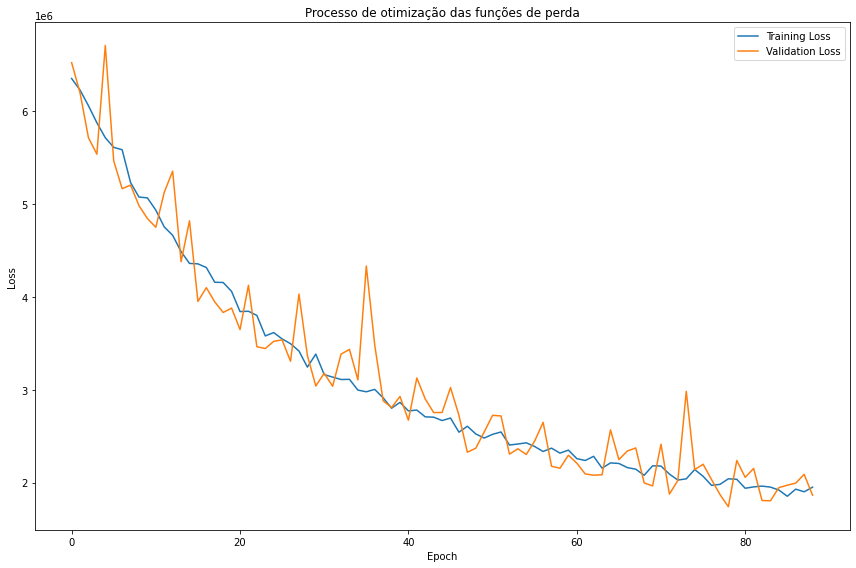

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(history.history['loss'], label='Training Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')

ax.set(
    title='Processo de otimização das funções de perda',
    ylabel='Loss',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

94/94 [==============================] - 0s 840us/step


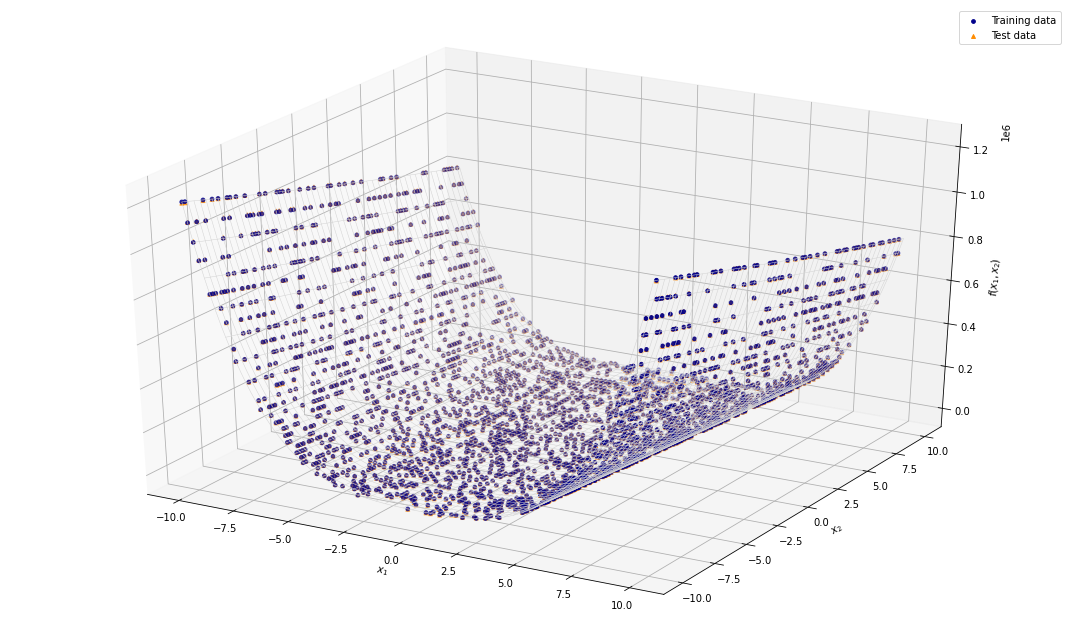

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9), subplot_kw=dict(projection='3d'))

y_pred = mlp.predict(x_test)

ax.plot_wireframe(x1, x2, z, linewidths=0.5, color='lightgrey')
ax.scatter(x_test[:,0], x_test[:,1], y_test, s=14, color='darkblue', label='Training data')
ax.scatter(x_test[:,0], x_test[:,1], y_pred, s=15, marker='^', color='darkorange', label='Test data')

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.legend()
plt.tight_layout()
plt.show()

##B)$f(x) = x_1^2+x_2^2+2x_1 x_2cos(πx_1x_2) + x_1+ x_2 -1  $

In [1]:
def g(x1,x2):
  r = x1**2 + x2**2 + 2 * x1*x2*np.cos(np.pi*x1*x2) + x1 + x2 - 1
  return r

###Plotando a Superficie da função

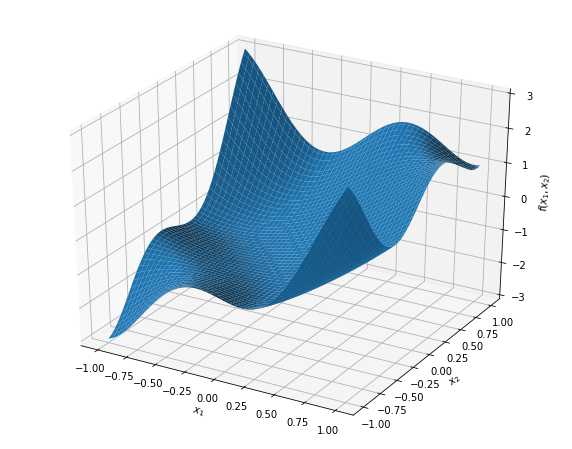

In [4]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection='3d'))

x1, x2 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
z1 = g(x1, x2)

ax.plot_surface(x1, x2, z1)
ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)
plt.show()

In [6]:
x_train, x_test, y_train, y_test = train_test_split(
    np.vstack([x1.flatten(), x2.flatten()]).T, 
    z1.flatten(), 
    test_size=0.3, 
    random_state=36
)

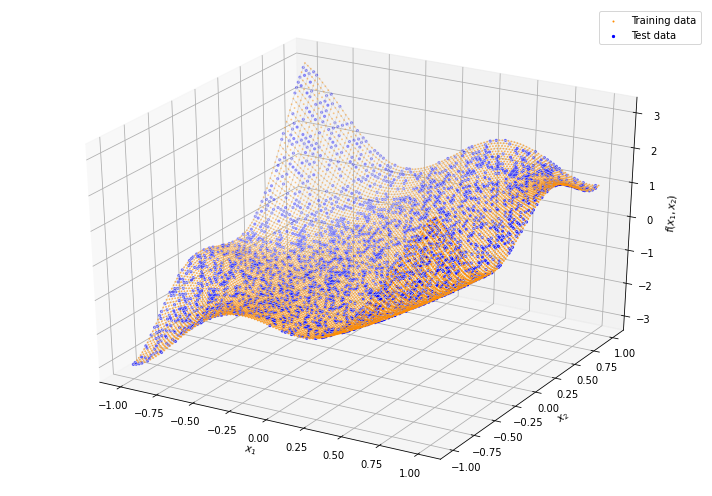

In [8]:
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(projection='3d'))

ax.plot_wireframe(x1, x2, z1, linewidths=0.5, color='lightgrey')
ax.scatter(x_train[:,0], x_train[:,1], y_train, s=1, color='darkorange', label='Training data')
ax.scatter(x_test[:,0], x_test[:,1], y_test, s=5, color='blue', label='Test data')

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.legend()
plt.tight_layout()
plt.show()

##Definindo a MLP

In [9]:
mlp = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])

mlp.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 2,977
Trainable params: 2,977
Non-trainabl

##Treinando a MLP

In [10]:
history = mlp.fit(
    x_train, y_train,
    batch_size=8,
    epochs=200,
    validation_split=0.1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
    ]
)

Epoch 1/200
788/788 [==============================] - 2s 2ms/step - loss: 0.3899 - val_loss: 0.2123 - lr: 0.0010
Epoch 2/200
788/788 [==============================] - 2s 2ms/step - loss: 0.1332 - val_loss: 0.0926 - lr: 0.0010
Epoch 3/200
788/788 [==============================] - 1s 2ms/step - loss: 0.0579 - val_loss: 0.0410 - lr: 0.0010
Epoch 4/200
788/788 [==============================] - 1s 2ms/step - loss: 0.0288 - val_loss: 0.0228 - lr: 0.0010
Epoch 5/200
788/788 [==============================] - 1s 2ms/step - loss: 0.0184 - val_loss: 0.0175 - lr: 0.0010
Epoch 6/200
788/788 [==============================] - 1s 2ms/step - loss: 0.0169 - val_loss: 0.0138 - lr: 0.0010
Epoch 7/200
788/788 [==============================] - 2s 2ms/step - loss: 0.0105 - val_loss: 0.0124 - lr: 0.0010
Epoch 8/200
788/788 [==============================] - 2s 2ms/step - loss: 0.0095 - val_loss: 0.0074 - lr: 0.0010
Epoch 9/200
788/788 [==============================] - 1s 2ms/step - loss: 0.0096 - val_

###Plotando a Fig

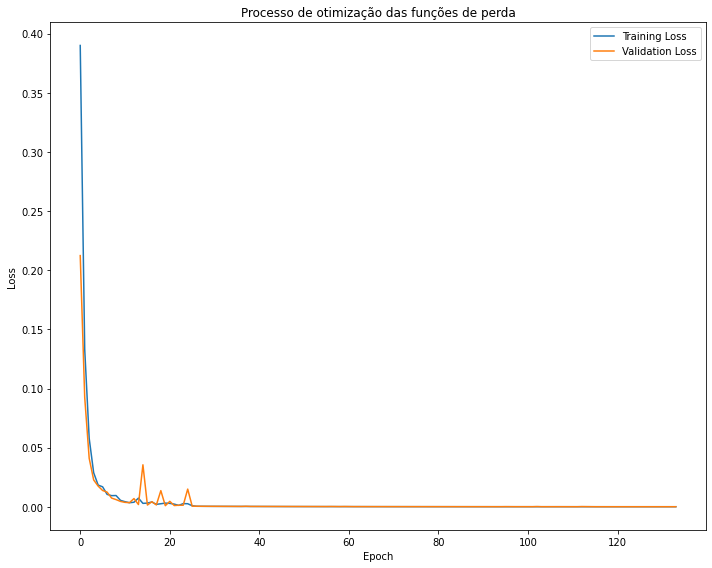

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(history.history['loss'], label='Training Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')

ax.set(
    title='Processo de otimização das funções de perda',
    ylabel='Loss',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

###Diferença dos valores reais pelos valores preditos 



94/94 [==============================] - 0s 1ms/step


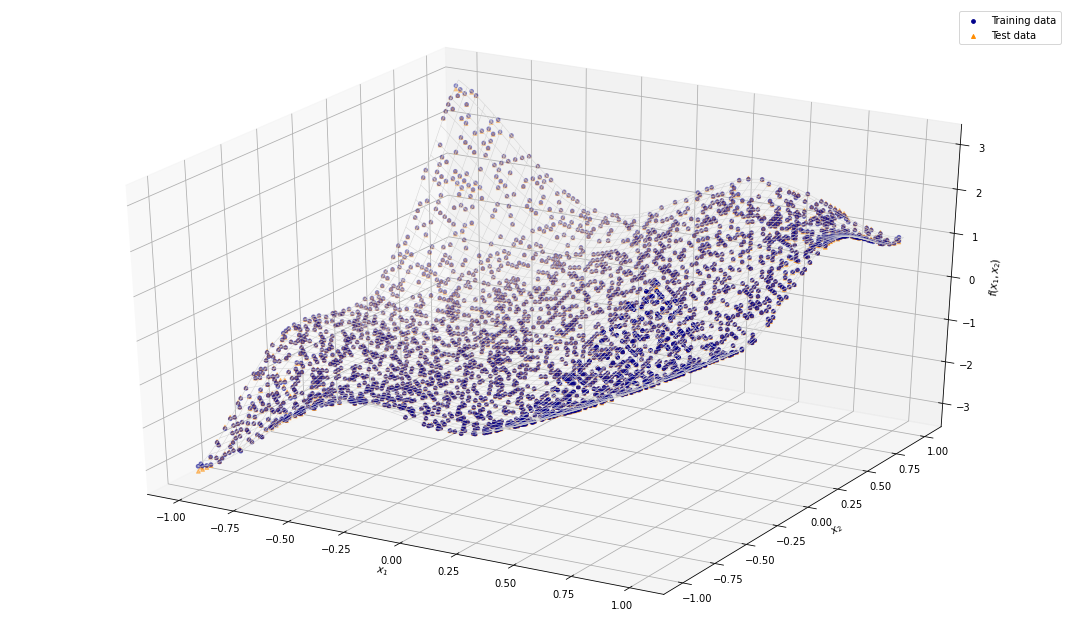

In [13]:
fig, ax = plt.subplots(figsize=(15, 9), subplot_kw=dict(projection='3d'))

y_pred = mlp.predict(x_test)

ax.plot_wireframe(x1, x2, z1, linewidths=0.5, color='lightgrey')
ax.scatter(x_test[:,0], x_test[:,1], y_test, s=14, color='darkblue', label='Training data')
ax.scatter(x_test[:,0], x_test[:,1], y_pred, s=15, marker='^', color='darkorange', label='Test data')

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.legend()
plt.tight_layout()
plt.show()

#QUESTÃO 2 


###A distribuição dos padrões podem ser representados por uma imagem que se assemelha a uma borboleta, sendo cada uma das "asas" a interseção entre dois semicirculos que representam um padrão e o quinto padrão é tudo que não se encontra dentro das asas da borboleta.

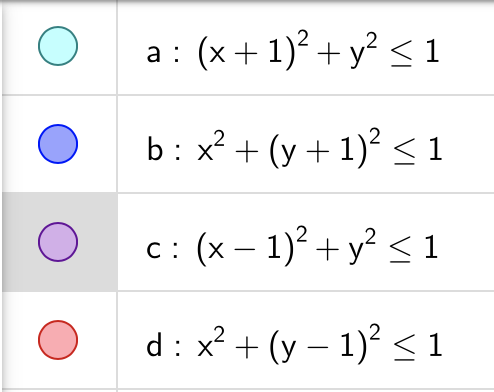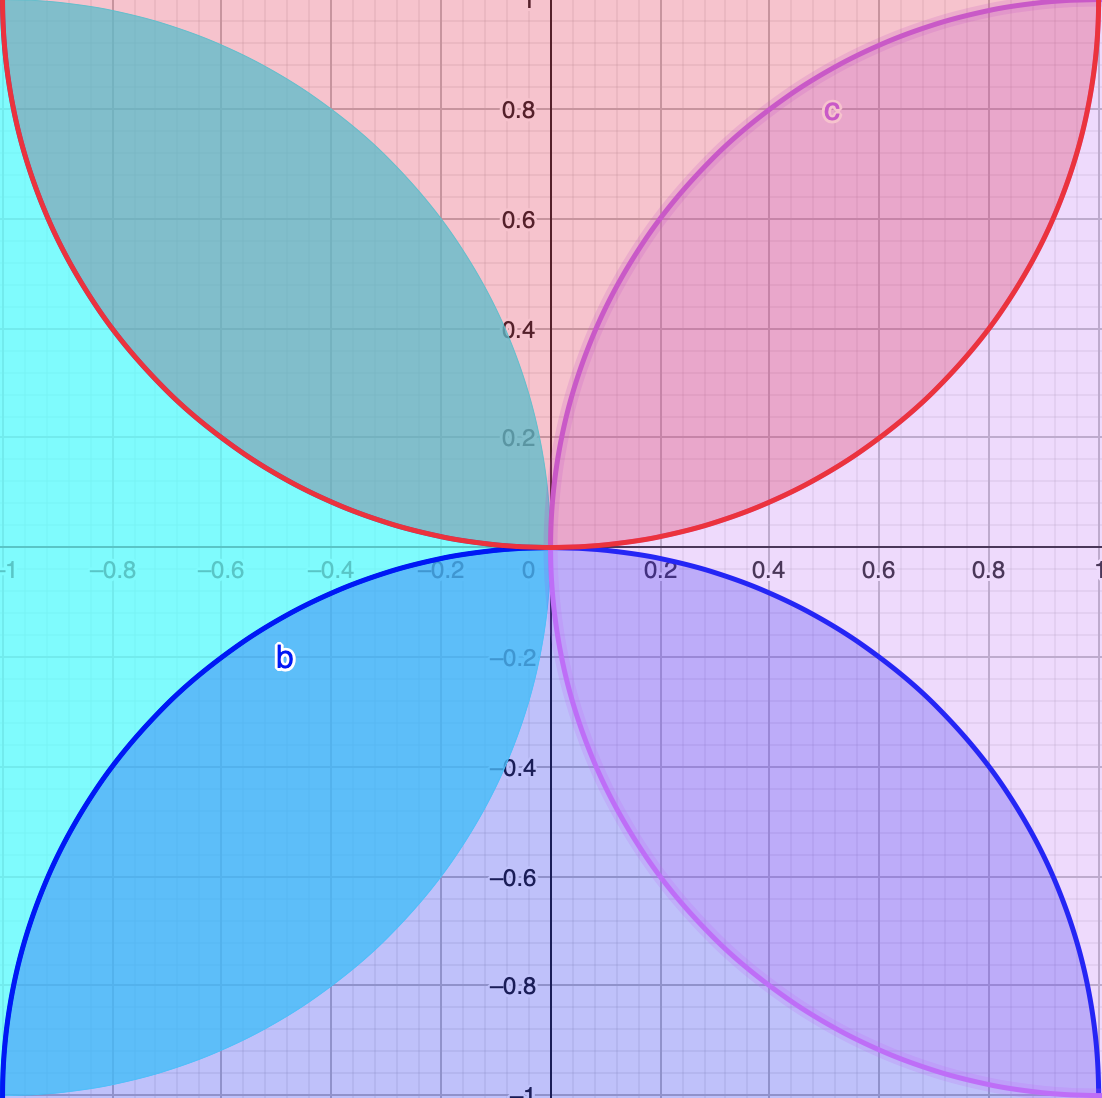

###Definindo as funções para cada um dos semi-circulos

In [11]:
def f2(x,y):
  if (x + 1)**2 + y**2 <= 1:
      return 1
  else:
      return 0

def f3(x,y):
  if (x - 1)**2 + y**2 <= 1:
      return 1
  else:
      return 0

def f4(x,y):
  if x**2 + (y + 1)**2 <= 1:
      return 1
  else:
      return 0

def f5(x,y):
  if x**2 + (y - 1)**2 <= 1:
      return 1
  else:
      return 0

##Classificando os pontos

In [12]:
x, y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))

points = np.vstack(list(zip(x.ravel(), y.ravel())))

lista = []
for x_i, y_i in points:
  if f2(x_i, y_i) + f5(x_i, y_i) == 2:
    lista.append(1)
  elif f3(x_i, y_i) + f5(x_i, y_i) == 2:
    lista.append(2)
  elif f3(x_i, y_i) + f4(x_i, y_i) == 2:
    lista.append(3)
  elif f2(x_i, y_i) + f4(x_i, y_i) == 2:
    lista.append(4)
  else:
    lista.append(0)

labels = np.array(lista)

##Definindo Treino e Teste 



In [13]:
x_train, x_test, y_train, y_test = train_test_split(points, labels, test_size=0.2, stratify=labels)


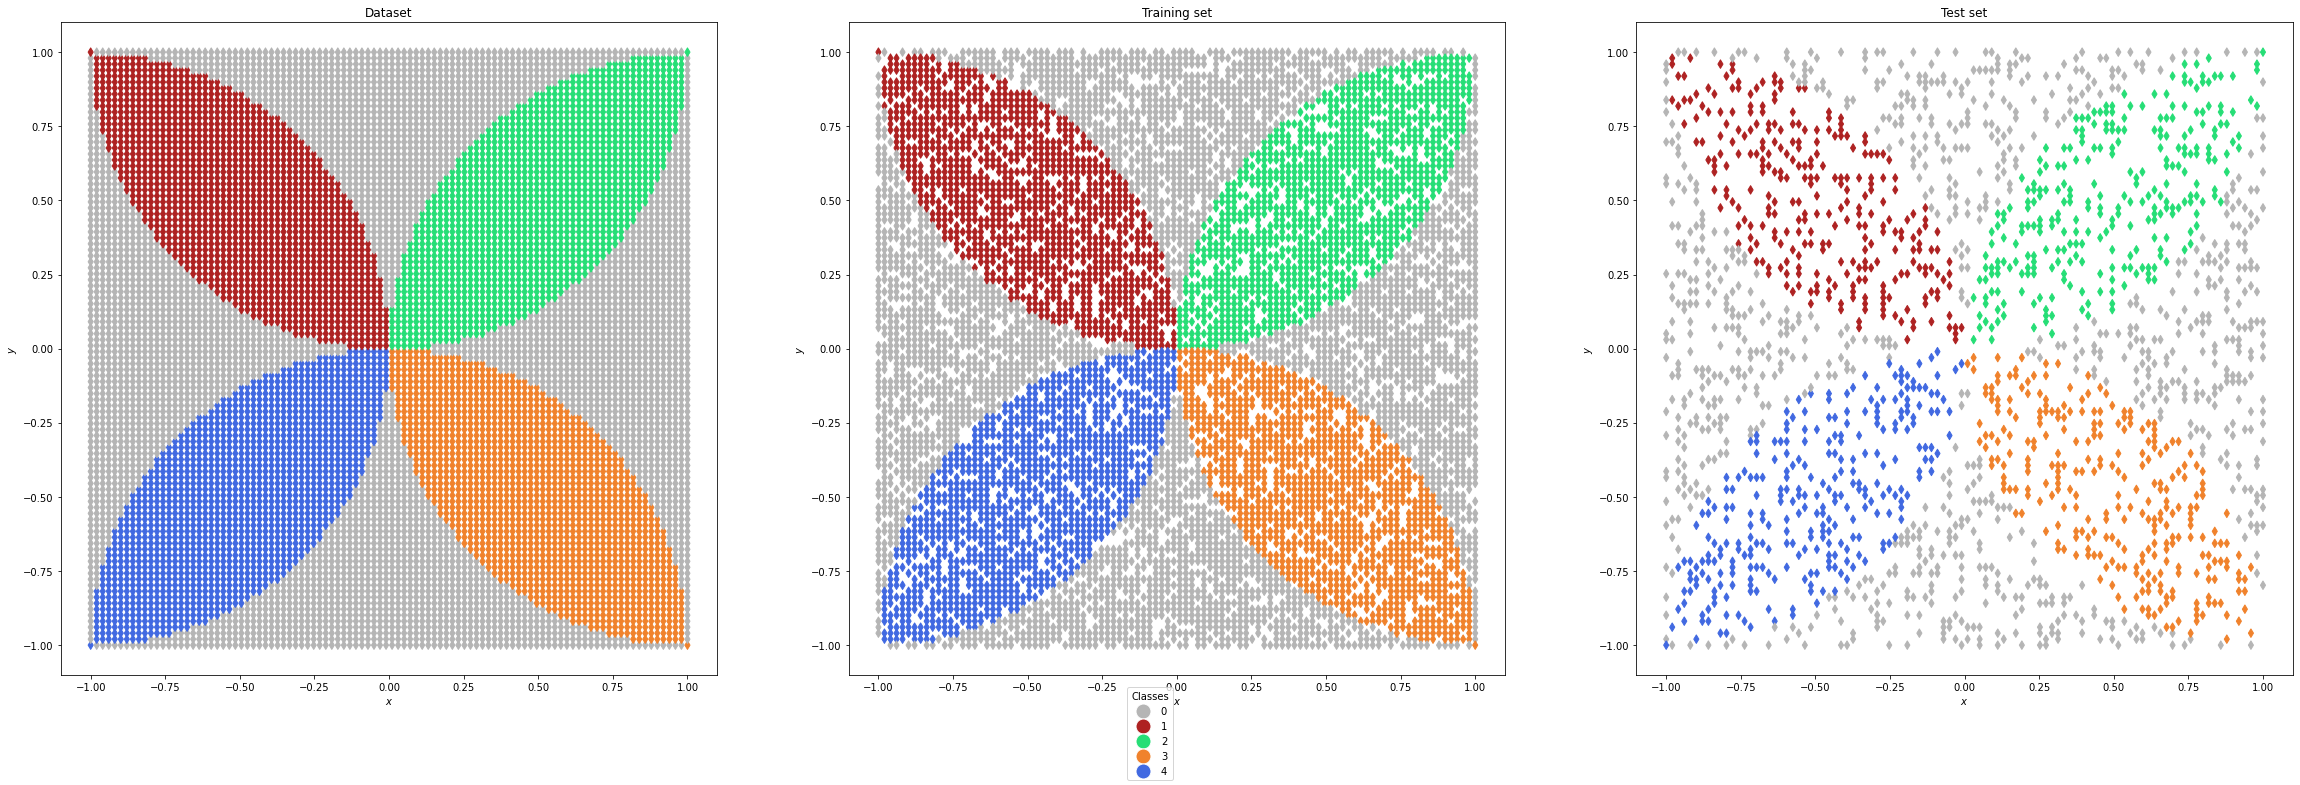

In [18]:
fig, ax = plt.subplots(ncols=3, figsize=(40, 12))

color1 = (181/255, 181/255, 181/255, 1.0)
color2 = (174/255, 34/255, 34/255, 1.0)
color3 = (38/255, 222/255, 118/255, 1.0)
color4 = (240/255, 130/255, 44/255, 1.0)
color5 = (65/255, 105/255, 225/255, 1.0)

colormap = np.array([color1, color2, color3, color4, color5])

dataset_scatter = ax[0].scatter(points[:,0], points[:,1], c=colormap[labels], marker='d')

ax[0].set(
    title='Dataset',
    xlabel='$x$',
    ylabel='$y$'
)

ax[1].scatter(x_train[:,0], x_train[:,1], c=colormap[y_train], marker='d')

ax[1].set(
    title='Training set',
    xlabel='$x$',
    ylabel='$y$'
)

ax[2].scatter(x_test[:,0], x_test[:,1], c=colormap[y_test], marker='d')

ax[2].set(
    title='Test set',
    xlabel='$x$',
    ylabel='$y$'
)

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor=(181/255, 181/255, 181/255), markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor=(174/255, 34/255, 34/255), markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor=(38/255, 222/255, 118/255), markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor=(240/255, 130/255, 44/255), markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor=(65/255, 105/255, 225/255), markersize=15)
]

fig.legend(
    legend_elements,
    ['0', '1', '2', '3', '4'],
    loc='lower center',
    title='Classes'
)

plt.show()

##Definindo o Modelo 

In [19]:
mlp = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(5, activation='softmax')
])

mlp.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)


mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 5)                 45        
                                                                 
Total params: 2,981
Trainable params: 2,981
Non-trainable params: 0
_________________________________________________________________


##Treinando o Modelo 

In [21]:
history = mlp.fit(
    x_train, y_train,
    batch_size=10,
    epochs=30,
    validation_split=0.1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
    ]
)

Epoch 1/30
720/720 [==============================] - 3s 3ms/step - loss: 0.7992 - acc: 0.6726 - val_loss: 0.3790 - val_acc: 0.8500 - lr: 0.0010
Epoch 2/30
720/720 [==============================] - 2s 2ms/step - loss: 0.3059 - acc: 0.8861 - val_loss: 0.2127 - val_acc: 0.9325 - lr: 0.0010
Epoch 3/30
720/720 [==============================] - 2s 2ms/step - loss: 0.2262 - acc: 0.9158 - val_loss: 0.1836 - val_acc: 0.9425 - lr: 0.0010
Epoch 4/30
720/720 [==============================] - 2s 2ms/step - loss: 0.1950 - acc: 0.9243 - val_loss: 0.1825 - val_acc: 0.9325 - lr: 0.0010
Epoch 5/30
720/720 [==============================] - 2s 2ms/step - loss: 0.1721 - acc: 0.9342 - val_loss: 0.1281 - val_acc: 0.9575 - lr: 0.0010
Epoch 6/30
720/720 [==============================] - 2s 2ms/step - loss: 0.1561 - acc: 0.9374 - val_loss: 0.1298 - val_acc: 0.9463 - lr: 0.0010
Epoch 7/30
720/720 [==============================] - 2s 2ms/step - loss: 0.1456 - acc: 0.9426 - val_loss: 0.1321 - val_acc: 0.947

## Avaliação do Modelo 


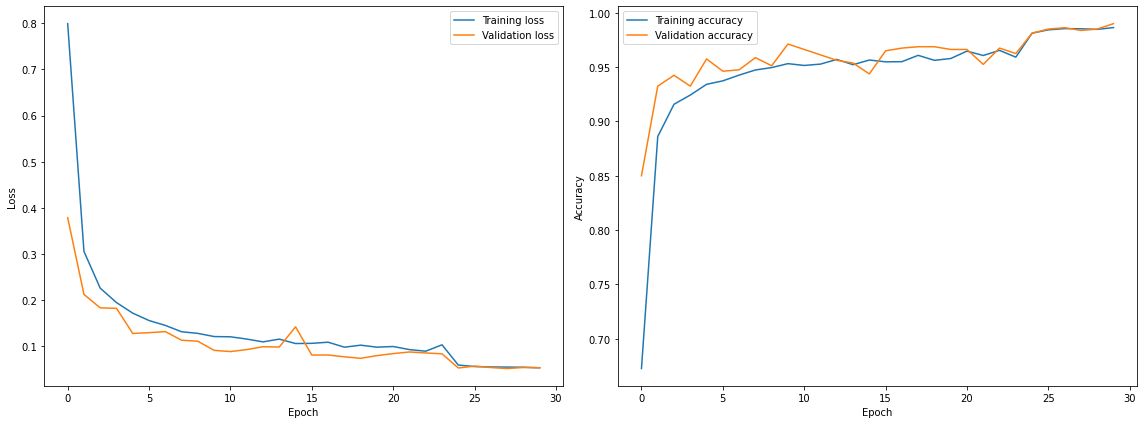

In [22]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 6))

ax[0].plot(history.history['loss'], label='Training loss')
ax[0].plot(history.history['val_loss'], label='Validation loss')

ax[0].legend()
ax[0].set(
    ylabel='Loss',
    xlabel='Epoch'
)

ax[1].plot(history.history['acc'], label='Training accuracy')
ax[1].plot(history.history['val_acc'], label='Validation accuracy')

ax[1].set(
    ylabel='Accuracy',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

In [23]:
y_pred = [ np.argmax(pred) for pred in mlp.predict(x_test) ]

63/63 [==============================] - 0s 1ms/step


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       884
           1       0.97      1.00      0.98       279
           2       0.96      1.00      0.98       279
           3       0.99      0.99      0.99       279
           4       0.99      0.97      0.98       279

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



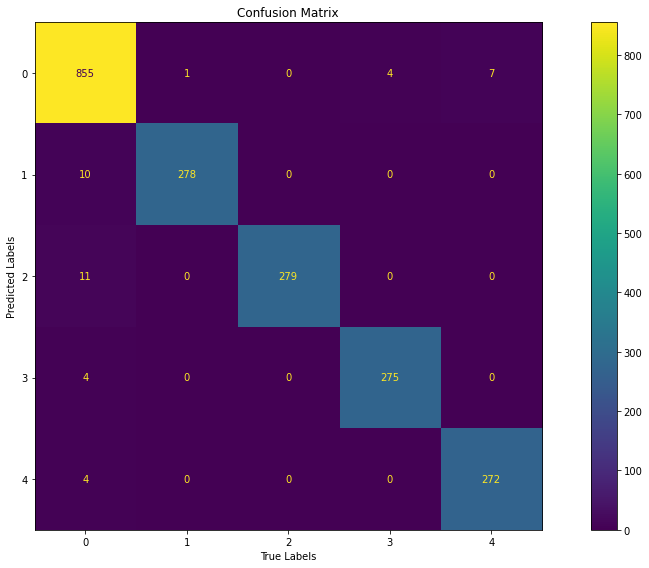

In [27]:
fig, ax = plt.subplots(figsize=(14, 8))

ConfusionMatrixDisplay(confusion_matrix(y_pred, y_test)).plot(values_format='.0f', ax=ax)

ax.set(
    title='Confusion Matrix',
    xlabel='True Labels',
    ylabel='Predicted Labels'
)

plt.tight_layout()
plt.show()

#QUESTÃO 6

### Redes neurais LSTM (Long Short-Term Memory) podem ser descritas como um tipo avançado de redes neurais recorrentes (RNN). Estas são redes utilizadas em problemas que envolvem series temporais, onde valores passados impactam em valores futuros. 

###As LSTMs tem esse nome graças a sua caracteristica de realimentação, essa realimentação é responsavel pelo efeito de memoria de curto e longo prazo.

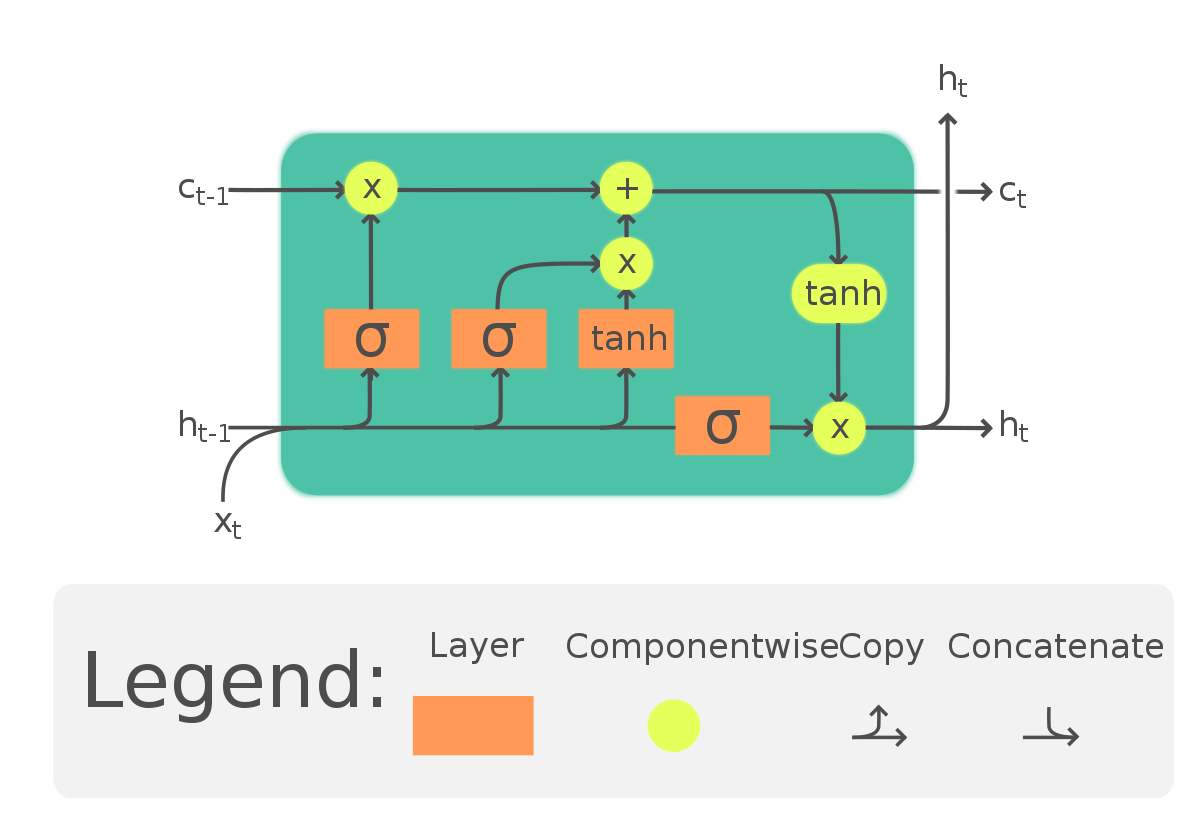
###Uma aplicação da LSTM por exemplo é a utilização dela para predição de proximos frames de um video. O codigo dessa apliação e sua explicação pode ser encontrado aqui: https://keras.io/examples/vision/conv_lstm/